In [167]:
# librerías:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn_extra.cluster import KMedoids
from scipy.cluster.hierarchy import linkage, fcluster

In [77]:
datos = pd.read_excel(r'/content/sample_data/data.xlsx', sheet_name='Datos')

In [78]:
datos.head(5)

,Entidad,Fecha,Solvencia,IRL,Cartera/Depósitos,Cartera/Activos,Gast_ope/Activos,ROA,ROE,Calidad,Utilidad/Ingresos
0,BANCAMÍA S. A.,2018-01-01,17.59,334.0,225.122316,82.101505,13.439939,1.649447,6.832722,5.288146,5.398005
1,BANCAMÍA S. A.,2018-02-01,17.52,290.4,212.079849,81.778429,13.299214,1.699940,7.028450,5.395301,5.543541
2,BANCAMÍA S. A.,2018-03-01,17.55,291.2,205.329984,81.630571,12.960920,1.836486,7.571401,5.567269,5.961291
3,BANCAMÍA S. A.,2018-04-01,17.48,335.3,198.756601,83.327073,13.322951,1.938096,7.962732,5.479457,6.244561
4,BANCAMÍA S. A.,2018-05-01,15.57,346.8,196.161567,82.957054,13.263120,2.004092,8.310213,5.415416,6.451046


In [79]:
x = datos.iloc[:, 2:]
x

,Solvencia,IRL,Cartera/Depósitos,Cartera/Activos,Gast_ope/Activos,ROA,ROE,Calidad,Utilidad/Ingresos
0,17.59,334.0,225.122316,82.101505,13.439939,1.649447,6.832722,5.288146,5.398005
1,17.52,290.4,212.079849,81.778429,13.299214,1.699940,7.028450,5.395301,5.543541
2,17.55,291.2,205.329984,81.630571,12.960920,1.836486,7.571401,5.567269,5.961291
3,17.48,335.3,198.756601,83.327073,13.322951,1.938096,7.962732,5.479457,6.244561
4,15.57,346.8,196.161567,82.957054,13.263120,2.004092,8.310213,5.415416,6.451046
...,...,...,...,...,...,...,...,...,...
1632,10.84,197.3,102.515452,75.744039,3.161129,0.106966,1.559908,4.233697,0.361228
1633,11.15,263.9,105.909252,75.768870,3.298532,-0.048405,-0.712194,4.662172,-0.161198
1634,11.26,222.2,106.662721,75.969979,3.357025,-0.132637,-1.965695,5.031444,-0.427350
1635,11.11,210.6,107.075948,73.938180,3.307338,-0.231987,-3.462358,4.859881,-0.712642


In [80]:
scaler = StandardScaler()
x_estandarizado = scaler.fit_transform(x)

In [81]:
pca = PCA()
pca.fit(x_estandarizado)

PCA()

In [82]:
# Obtener la varianza explicada por el primer componente principal:

varianza_explicada_primer_componente = pca.explained_variance_ratio_[0]
varianza_explicada_primer_componente

0.3419410761340794

In [83]:
loadings = pca.components_[0, :]
loadings = pd.DataFrame(loadings)
loadings

,0
0,-0.167626
1,-0.126689
2,0.205649
3,0.311885
4,0.132555
5,-0.491454
6,-0.512693
7,0.187093
8,-0.509247


In [84]:
x_estandarizado = pd.DataFrame(x_estandarizado)
x_estandarizado

,0,1,2,3,4,5,6,7,8
0,0.219634,0.546775,3.243551,0.643158,2.738302,0.348314,-0.085680,0.227495,0.014956
1,0.205304,0.234221,2.857529,0.621865,2.696003,0.378788,-0.069851,0.265665,0.029624
2,0.211445,0.239956,2.657751,0.612120,2.594319,0.461196,-0.025942,0.326923,0.071730
3,0.197115,0.556095,2.463196,0.723930,2.703138,0.522519,0.005705,0.295643,0.100282
4,-0.193890,0.638534,2.386390,0.699543,2.685154,0.562349,0.033806,0.272831,0.121094
...,...,...,...,...,...,...,...,...,...
1632,-1.162191,-0.433182,-0.385288,0.224163,-0.351285,-0.582600,-0.512097,-0.148119,-0.492712
1633,-1.098730,0.044251,-0.284840,0.225800,-0.309984,-0.676369,-0.695844,0.004511,-0.545369
1634,-1.076211,-0.254682,-0.262539,0.239054,-0.292403,-0.727204,-0.797216,0.136053,-0.572195
1635,-1.106918,-0.337839,-0.250309,0.105146,-0.307338,-0.787164,-0.918253,0.074939,-0.600950


In [88]:
# Crear un nuevo DataFrame para almacenar los resultados
result_df = pd.DataFrame()

# Iterar sobre las filas de df1 y multiplicar cada columna de df2 por el valor correspondiente de df1
for i in range(9):
  valor = loadings.iloc[i, :]
  valor = valor.values
  result = x_estandarizado[i] * valor
  result_df = pd.concat([result_df, pd.DataFrame(result)], axis=1)

result_df

,0,1,2,3,4,5,6,7,8
0,-0.036816,-0.069271,0.667032,0.200591,0.362975,-0.171181,0.043928,0.042563,-0.007616
1,-0.034414,-0.029673,0.587647,0.193951,0.357368,-0.186157,0.035812,0.049704,-0.015086
2,-0.035444,-0.030400,0.546562,0.190911,0.343889,-0.226657,0.013300,0.061165,-0.036528
3,-0.033042,-0.070451,0.506553,0.225783,0.358314,-0.256794,-0.002925,0.055313,-0.051068
4,0.032501,-0.080895,0.490758,0.218177,0.355930,-0.276369,-0.017332,0.051045,-0.061667
...,...,...,...,...,...,...,...,...,...
1632,0.194813,0.054880,-0.079234,0.069913,-0.046564,0.286321,0.262549,-0.027712,0.250912
1633,0.184175,-0.005606,-0.058577,0.070424,-0.041090,0.332404,0.356754,0.000844,0.277727
1634,0.180401,0.032265,-0.053991,0.074557,-0.038759,0.357387,0.408727,0.025454,0.291388
1635,0.185548,0.042801,-0.051476,0.032794,-0.040739,0.386855,0.470781,0.014021,0.306032


In [89]:
result_df.columns = x.columns
result_df

,Solvencia,IRL,Cartera/Depósitos,Cartera/Activos,Gast_ope/Activos,ROA,ROE,Calidad,Utilidad/Ingresos
0,-0.036816,-0.069271,0.667032,0.200591,0.362975,-0.171181,0.043928,0.042563,-0.007616
1,-0.034414,-0.029673,0.587647,0.193951,0.357368,-0.186157,0.035812,0.049704,-0.015086
2,-0.035444,-0.030400,0.546562,0.190911,0.343889,-0.226657,0.013300,0.061165,-0.036528
3,-0.033042,-0.070451,0.506553,0.225783,0.358314,-0.256794,-0.002925,0.055313,-0.051068
4,0.032501,-0.080895,0.490758,0.218177,0.355930,-0.276369,-0.017332,0.051045,-0.061667
...,...,...,...,...,...,...,...,...,...
1632,0.194813,0.054880,-0.079234,0.069913,-0.046564,0.286321,0.262549,-0.027712,0.250912
1633,0.184175,-0.005606,-0.058577,0.070424,-0.041090,0.332404,0.356754,0.000844,0.277727
1634,0.180401,0.032265,-0.053991,0.074557,-0.038759,0.357387,0.408727,0.025454,0.291388
1635,0.185548,0.042801,-0.051476,0.032794,-0.040739,0.386855,0.470781,0.014021,0.306032


In [90]:
result_df = pd.concat([result_df, datos[['Entidad', 'Fecha']]], axis=1)

In [92]:
indicador = pca.transform(x_estandarizado)[:, 0]

In [94]:
indicador = pd.DataFrame(indicador)
indicador

,0
0,1.032205
1,0.959151
2,0.826800
3,0.731682
4,0.712147
...,...
1632,0.965877
1633,1.117056
1634,1.277430
1635,1.346616


In [96]:
result_df = pd.concat([result_df, indicador[0:]], axis=1)

In [100]:
result_df = result_df.rename(columns={0: 'Indicador'})

In [101]:
result_df

,Solvencia,IRL,Cartera/Depósitos,Cartera/Activos,Gast_ope/Activos,ROA,ROE,Calidad,Utilidad/Ingresos,Entidad,Fecha,Indicador
0,-0.036816,-0.069271,0.667032,0.200591,0.362975,-0.171181,0.043928,0.042563,-0.007616,BANCAMÍA S. A.,2018-01-01,1.032205
1,-0.034414,-0.029673,0.587647,0.193951,0.357368,-0.186157,0.035812,0.049704,-0.015086,BANCAMÍA S. A.,2018-02-01,0.959151
2,-0.035444,-0.030400,0.546562,0.190911,0.343889,-0.226657,0.013300,0.061165,-0.036528,BANCAMÍA S. A.,2018-03-01,0.826800
3,-0.033042,-0.070451,0.506553,0.225783,0.358314,-0.256794,-0.002925,0.055313,-0.051068,BANCAMÍA S. A.,2018-04-01,0.731682
4,0.032501,-0.080895,0.490758,0.218177,0.355930,-0.276369,-0.017332,0.051045,-0.061667,BANCAMÍA S. A.,2018-05-01,0.712147
...,...,...,...,...,...,...,...,...,...,...,...,...
1632,0.194813,0.054880,-0.079234,0.069913,-0.046564,0.286321,0.262549,-0.027712,0.250912,SCOTIABANK COLPATRIA S.A.,2023-02-01,0.965877
1633,0.184175,-0.005606,-0.058577,0.070424,-0.041090,0.332404,0.356754,0.000844,0.277727,SCOTIABANK COLPATRIA S.A.,2023-03-01,1.117056
1634,0.180401,0.032265,-0.053991,0.074557,-0.038759,0.357387,0.408727,0.025454,0.291388,SCOTIABANK COLPATRIA S.A.,2023-04-01,1.277430
1635,0.185548,0.042801,-0.051476,0.032794,-0.040739,0.386855,0.470781,0.014021,0.306032,SCOTIABANK COLPATRIA S.A.,2023-05-01,1.346616


<ipython-input-108-1b73a92d965e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Fecha'] = pd.to_datetime(df_filtrado['Fecha'])


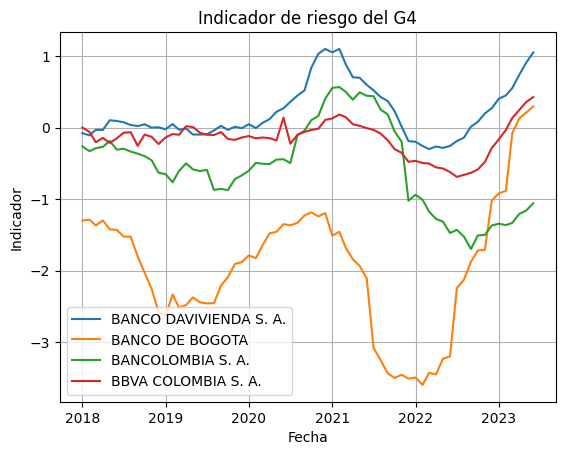

In [108]:
# Gráfico del G4

# Filtrar el DataFrame para obtener solo los registros de bancolombia, davivienda, bogota y bbva
bancos_seleccionados = ['BANCO DAVIVIENDA S. A.', 'BANCO DE BOGOTA', 'BANCOLOMBIA S. A.', 'BBVA COLOMBIA S. A.']
df_filtrado = result_df[result_df['Entidad'].isin(bancos_seleccionados)]

# Convertir la columna 'Fecha' a tipo datetime
df_filtrado['Fecha'] = pd.to_datetime(df_filtrado['Fecha'])

# Crear un gráfico de líneas para cada entidad
fig, ax = plt.subplots()

for entidad, data_entidad in df_filtrado.groupby('Entidad'):
    ax.plot(data_entidad['Fecha'], data_entidad['Indicador'], label=entidad)

# Configuración adicional del gráfico
plt.title('Indicador de riesgo del G4')
plt.xlabel('Fecha')
plt.ylabel('Indicador')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()

In [109]:
# Seleccionar la fecha específica
result_df['Fecha'] = pd.to_datetime(result_df['Fecha'])
fecha_especifica = '2023-06-01'
df_filtrado = result_df[result_df['Fecha'] == fecha_especifica]

# Encontrar los 5 valores máximos de la variable 'Indicador'
top5_valores_maximos = df_filtrado.nlargest(5, 'Indicador')

print(top5_valores_maximos)

      Solvencia       IRL  Cartera/Depósitos  Cartera/Activos  \
989    0.122064  0.090662           0.104199         0.026911   
659    0.148830  0.001296          -0.040822         0.283253   
1570   0.022893  0.068502          -0.022325         0.225863   
1055   0.210941  0.125446          -0.119113         0.043355   
1636   0.177312  0.066414          -0.059886         0.019074   

      Gast_ope/Activos       ROA       ROE   Calidad  Utilidad/Ingresos  \
989          -0.007782  2.091362  3.264735  0.131550           2.201003   
659           0.056334  0.818835  0.853852  0.487094           0.559860   
1570          0.319922  0.758147  0.766304  0.008065           0.545386   
1055         -0.049571  0.595255  0.767117 -0.074347           0.508285   
1636         -0.039653  0.413603  0.527829  0.022921           0.315616   

                        Entidad      Fecha  Indicador  
989       BANCO PICHINCHA S. A. 2023-06-01   8.024704  
659       BANCO FALABELLA S. A. 2023-06-01   3

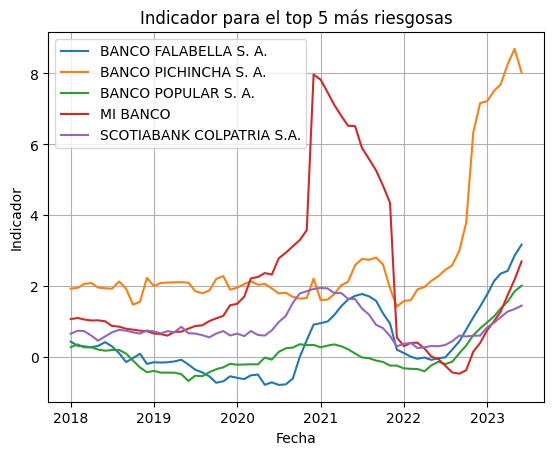

In [110]:
bancos_seleccionados = ['BANCO PICHINCHA S. A.', 'BANCO FALABELLA S. A.', 'MI BANCO', 'BANCO POPULAR S. A.','SCOTIABANK COLPATRIA S.A.']
df_filtrado = result_df[result_df['Entidad'].isin(bancos_seleccionados)]

# Crear un gráfico de líneas para cada entidad
fig, ax = plt.subplots()

for entidad, data_entidad in df_filtrado.groupby('Entidad'):
    ax.plot(data_entidad['Fecha'], data_entidad['Indicador'], label=entidad)

# Configuración adicional del gráfico
plt.title('Indicador para el top 5 más riesgosas')
plt.xlabel('Fecha')
plt.ylabel('Indicador')
plt.legend()
plt.grid(True)

# Mostrar el gráfico
plt.show()


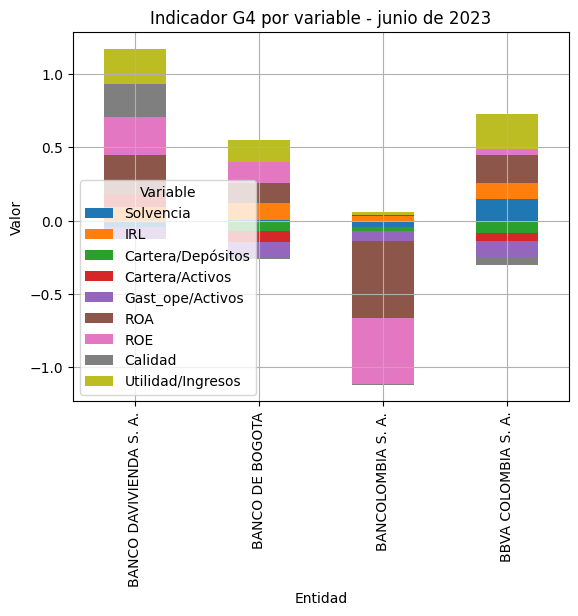

In [116]:
# G4

# Filtrar el DataFrame para obtener solo los registros de bancolombia, davivienda, bogota y bbva
bancos_seleccionados = ['BANCO DAVIVIENDA S. A.', 'BANCO DE BOGOTA', 'BANCOLOMBIA S. A.', 'BBVA COLOMBIA S. A.']
df_filtrado = result_df[result_df['Entidad'].isin(bancos_seleccionados)]
fecha_especifica = '2023-06-01'
df_filtrado = df_filtrado[df_filtrado['Fecha'] == fecha_especifica]
# Excluir las dos últimas variables
df_subset = df_filtrado .iloc[:, :-2]
# Configuración del gráfico de barras apiladas
fig, ax = plt.subplots()
df_subset.set_index('Entidad').plot(kind='bar', stacked=True, ax=ax)

# Configuración adicional del gráfico
plt.title('Indicador G4 por variable - junio de 2023')
plt.xlabel('Entidad')
plt.ylabel('Valor')
plt.legend(title='Variable')
plt.grid(True)

# Mostrar el gráfico
plt.show()



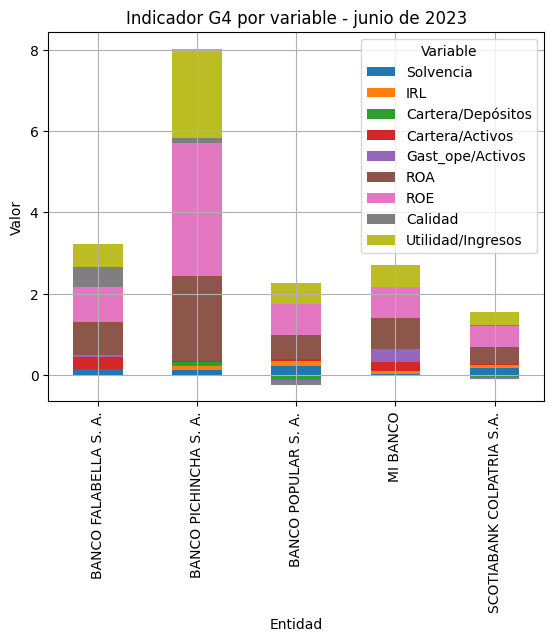

In [117]:
# Más riesgosas

# Filtrar el DataFrame para obtener solo los registros de bancolombia, davivienda, bogota y bbva
bancos_seleccionados = ['BANCO PICHINCHA S. A.', 'BANCO FALABELLA S. A.', 'MI BANCO', 'BANCO POPULAR S. A.','SCOTIABANK COLPATRIA S.A.']
df_filtrado = result_df[result_df['Entidad'].isin(bancos_seleccionados)]
fecha_especifica = '2023-06-01'
df_filtrado = df_filtrado[df_filtrado['Fecha'] == fecha_especifica]
# Excluir las dos últimas variables
df_subset = df_filtrado .iloc[:, :-2]
# Configuración del gráfico de barras apiladas
fig, ax = plt.subplots()
df_subset.set_index('Entidad').plot(kind='bar', stacked=True, ax=ax)

# Configuración adicional del gráfico
plt.title('Indicador G4 por variable - junio de 2023')
plt.xlabel('Entidad')
plt.ylabel('Valor')
plt.legend(title='Variable')
plt.grid(True)

# Mostrar el gráfico
plt.show()

**K-means con las variables**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

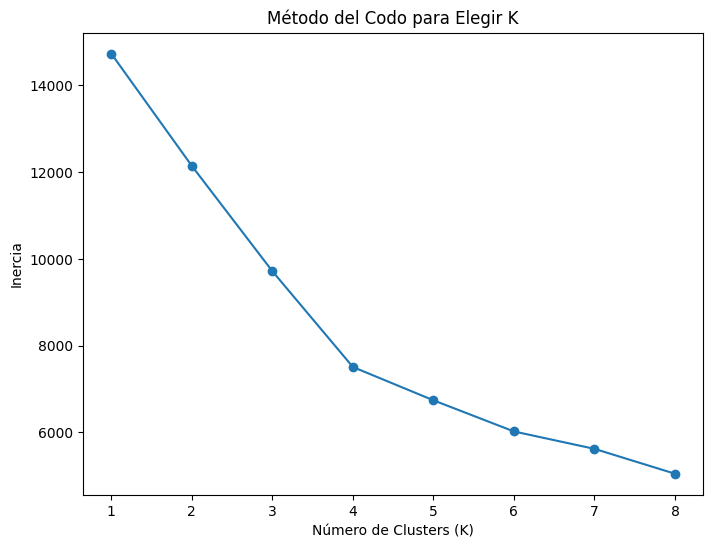

In [120]:
# Se utiliza el metodo del codo (Elbow) para determinar el mejor parametro de k para empezar:

inertia = []
for k in range(1, 9):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(x_estandarizado)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(range(1, 9), inertia, marker='o')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Inercia')
plt.title('Método del Codo para Elegir K')
plt.show()

In [124]:
# Utilice este espacio para escribir el código.
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(x_estandarizado)

# Obtener las etiquetas de cluster asignadas a cada imagen
cluster_labels = kmeans.labels_

# Crear un DataFrame con las etiquetas de cluster
cluster_df_kmeas = pd.DataFrame({ 'Cluster': cluster_labels})

In [125]:
# se calcula el silhouette score:

score_1 = silhouette_score(x_estandarizado, cluster_labels)
print(f"Silhouette Score: {score_1}")

Silhouette Score: 0.3583475967721601


**K-medoides**

In [133]:
# Crear el modelo de k-medoides
kmedoids = KMedoids(n_clusters=4, random_state=0)

# Ajustar el modelo a los datos originales
kmedoids.fit(x_estandarizado)

# Obtener las etiquetas de cluster asignadas a cada imagen
cluster_labels = kmedoids.labels_

# Crear un DataFrame con las etiquetas de cluster
cluster_df_kmedoids = pd.DataFrame({ 'Cluster': cluster_labels})

In [134]:
# se calcula el silhouette score:

score_1 = silhouette_score(x_estandarizado, cluster_labels)
print(f"Silhouette Score: {score_1}")

Silhouette Score: 0.13150983015804543


**K-medias con los componentes**

In [139]:
# Configurar y aplicar PCA:
n_components = 0.75  # Retener el 80% de la varianza.
pca = PCA(n_components=n_components, svd_solver='full', random_state=0)
x_pca = pca.fit(x_estandarizado)

In [140]:
# Imprimir la cantidad de componentes y la varianza explicada
print("Número de componentes seleccionados:", pca.n_components_)
print("Varianza explicada por los componentes seleccionados:", sum(pca.explained_variance_ratio_))

Número de componentes seleccionados: 4
Varianza explicada por los componentes seleccionados: 0.8352868893713813


In [150]:
#Volviendo aplicar K-medias
# Ajustar PCA a los datos originales y transformarlos
x_reduced = pca.fit_transform(x_estandarizado)

kmeans = KMeans(n_clusters=4, random_state=0, n_init=10)
kmeans.fit(x_reduced)

# Obtener las etiquetas de cluster asignadas a cada imagen
cluster_labels = kmeans.labels_

# Crear un DataFrame con las etiquetas de cluster
cluster_df_pca = pd.DataFrame({ 'Cluster': cluster_labels})

In [142]:
# se calcula el silhouette score:

score_1 = silhouette_score(x_estandarizado, cluster_labels)
print(f"Silhouette Score: {score_1}")

Silhouette Score: 0.36446722212732324


In [151]:
cluster_df_pca = pd.concat([cluster_df_pca, datos[['Entidad', 'Fecha']]], axis=1)

In [153]:
# Seleccionar la fecha específica
cluster_df_pca['Fecha'] = pd.to_datetime(cluster_df_pca['Fecha'])
fecha_especifica = '2023-06-01'
df_filtrado = cluster_df_pca[cluster_df_pca['Fecha'] == fecha_especifica]

In [155]:
df_filtrado

,Cluster,Entidad,Fecha
65,1,BANCAMÍA S. A.,2023-06-01
131,0,BANCIEN S.A,2023-06-01
197,3,BANCO AGRARIO,2023-06-01
263,0,BANCO AV VILLAS S. A.,2023-06-01
329,0,BANCO COOMEVA S. A.,2023-06-01
395,0,BANCO COOPCENTRAL,2023-06-01
461,0,BANCO DAVIVIENDA S. A.,2023-06-01
527,0,BANCO DE BOGOTA,2023-06-01
593,0,BANCO DE OCCIDENTE,2023-06-01
659,0,BANCO FALABELLA S. A.,2023-06-01


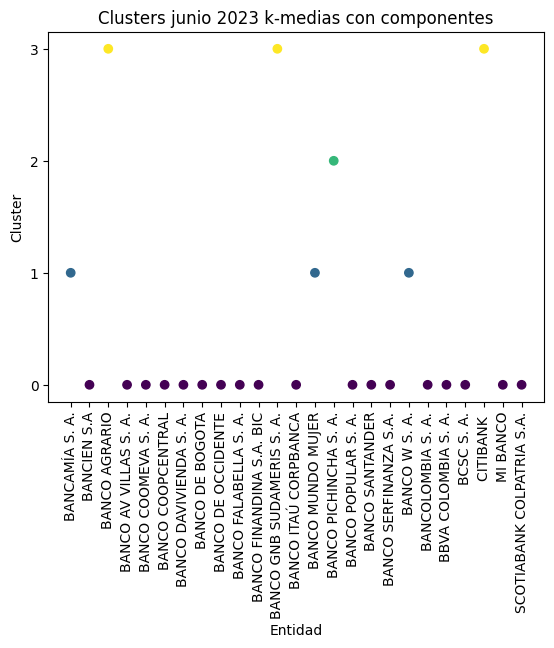

In [161]:
# Mapear los valores de la variable indicadora a colores
colors = plt.cm.viridis(df_filtrado['Cluster'] / max(df_filtrado['Cluster']))

# Crear el scatter plot de la variable indicadora
plt.scatter(df_filtrado['Entidad'], df_filtrado['Cluster'],c=colors, marker='o')

# Configuración adicional del gráfico
plt.title('Clusters junio 2023 k-medias con componentes')
plt.xlabel('Entidad')
plt.ylabel('Cluster')
plt.yticks([0, 1, 2, 3])  # Ajustar marcas del eje y según tus valores
plt.xticks(rotation='vertical')
# Mostrar el gráfico
plt.show()

**Jerárquico con average**

In [218]:
n_components = 0.80  # Retener el 80% de la varianza.
pca = PCA(n_components=n_components, svd_solver='full', random_state=0)
pca.fit(x_estandarizado)

# Ajustar PCA a los datos originales y transformarlos
x_reduced = pca.fit_transform(x_estandarizado)

distances = linkage(x_reduced, method='complete', metric="euclidean")
clusters = fcluster(distances, 4, criterion="distance")

In [219]:
cluster_centroid = pd.DataFrame(clusters)

In [220]:
cluster_centroid = pd.concat([cluster_centroid, datos[['Entidad', 'Fecha']]], axis=1)

In [221]:
# Seleccionar la fecha específica
cluster_centroid['Fecha'] = pd.to_datetime(cluster_centroid['Fecha'])
fecha_especifica = '2023-06-01'
df_filtrado = cluster_centroid[cluster_centroid['Fecha'] == fecha_especifica]

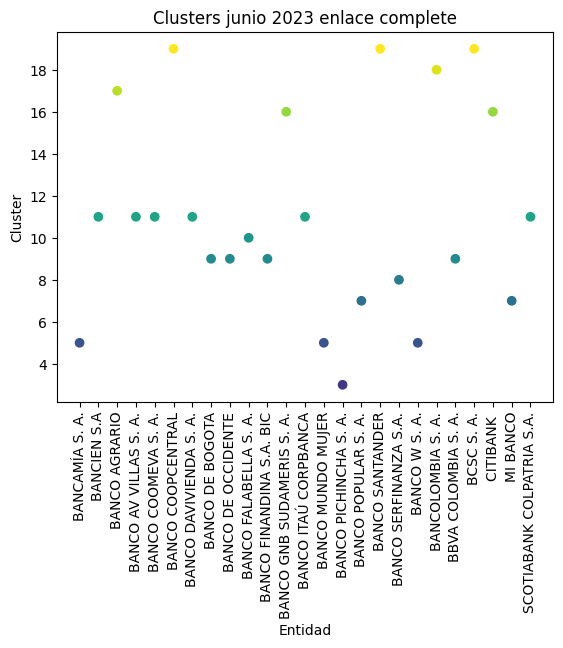

In [224]:
# Mapear los valores de la variable indicadora a colores
colors = plt.cm.viridis(df_filtrado[0] / max(df_filtrado[0]))

# Crear el scatter plot de la variable indicadora
plt.scatter(df_filtrado['Entidad'], df_filtrado[0],c=colors, marker='o')

# Configuración adicional del gráfico
plt.title('Clusters junio 2023 enlace complete')
plt.xlabel('Entidad')
plt.ylabel('Cluster')
plt.xticks(rotation='vertical')
# Mostrar el gráfico
plt.show()

In [225]:
df_filtrado

,0,Entidad,Fecha
65,5,BANCAMÍA S. A.,2023-06-01
131,11,BANCIEN S.A,2023-06-01
197,17,BANCO AGRARIO,2023-06-01
263,11,BANCO AV VILLAS S. A.,2023-06-01
329,11,BANCO COOMEVA S. A.,2023-06-01
395,19,BANCO COOPCENTRAL,2023-06-01
461,11,BANCO DAVIVIENDA S. A.,2023-06-01
527,9,BANCO DE BOGOTA,2023-06-01
593,9,BANCO DE OCCIDENTE,2023-06-01
659,10,BANCO FALABELLA S. A.,2023-06-01
